In [1]:
# Script to plot the HI Mass as a function of Halo Mass (M_vir) for all values of z
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput
import pandas as pd
from Functions import *
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# INPUT SNAP SHOT WANTED HERE
snapshot_used = 250
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used) # Get Galaxy catalogue
snaplist_index_used = list(snaplist[0]).index(snapshot_used) # convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = round(redshift_used, 1) # round float to nearest 1st decimal
redshift_used = str(redshift_used)
print(redshift_used)
#Get HI Mass (MHI) and Halo Mass (Mvir) and log10(MHI/Mvir) and log10(Mvir)
MHI = gals["HIMass"]
Mvir = gals["Mvir"]
MHI_Mvir = MHI / Mvir
# LOG
log_MHI = np.log10(MHI*1e10)
log_Mvir = np.log10(Mvir*1e10)
log_MHI_Mvir = np.log10(MHI_Mvir*1e10)
print(log_Mvir)
print(log_MHI_Mvir)
# Calculate the volume of the simulation 
Sim_Vol = sim_props["Volume"]

0.0
[10.410791 10.374163 11.53421  ...  9.782402  9.782402  9.782402]
[7.151933  6.5557427 5.017111  ...      -inf      -inf      -inf]


<ipython-input-1-6e11d5cebf4c>:23: RuntimeWarning: divide by zero encountered in log10
  log_MHI = np.log10(MHI*1e10)
<ipython-input-1-6e11d5cebf4c>:25: RuntimeWarning: divide by zero encountered in log10
  log_MHI_Mvir = np.log10(MHI_Mvir*1e10)


In [2]:
himf_MHI_Mvir = ALICE_mass_function(log_MHI_Mvir,  sim_props["Volume"], bins=50, range=(7.5, 11.5)) # ALL GALS
himf_Mvir = ALICE_mass_function(log_Mvir,  sim_props["Volume"], bins=50, range=(7.5, 11.5)) # ALL GALS
himf_MHI = ALICE_mass_function(log_MHI,  sim_props["Volume"], bins=50, range=(7.5, 11.5)) # ALL GALS

log_MHI_Mvir = himf_MHI_Mvir[:, 0] #ratio masses
log_HIMF_MHI_Mvir = np.log10(himf_MHI_Mvir[:, 1]) # HMIF of MHI/Mvir

log_Mvir = himf_Mvir[:, 0] # Mvir mass
log_HIMF_Mvir = np.log10(himf_Mvir[:, 1]) # HIMF Mvir

log_MHI = himf_MHI[:, 0] # Mvir mass
log_HIMF = np.log10(himf_MHI[:, 1]) # HIMF Mvir


N_gals  :  [136690 129907 114646  95080  72801  50868  32715  18786   9735   4617
   2099   1088    638    436    329    274    210    199    146     87
     79     56     46     28     17     16     12      6      2      1
      2      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0]
edges  :  [ 7.5   7.58  7.66  7.74  7.82  7.9   7.98  8.06  8.14  8.22  8.3   8.38
  8.46  8.54  8.62  8.7   8.78  8.86  8.94  9.02  9.1   9.18  9.26  9.34
  9.42  9.5   9.58  9.66  9.74  9.82  9.9   9.98 10.06 10.14 10.22 10.3
 10.38 10.46 10.54 10.62 10.7  10.78 10.86 10.94 11.02 11.1  11.18 11.26
 11.34 11.42 11.5 ]
bin width  :  0.07999992
bin_center :  [ 7.54       7.62       7.7        7.7799997  7.86       7.94
  8.02       8.1        8.18       8.26       8.34       8.42
  8.5        8.58       8.66       8.74       8.82       8.9
  8.98       9.06       9.14       9.22       9.3        9.38
  9.46       9.54       9.

<ipython-input-2-bd63b89d2103>:6: RuntimeWarning: divide by zero encountered in log10
  log_HIMF_MHI_Mvir = np.log10(himf_MHI_Mvir[:, 1]) # HMIF of MHI/Mvir
<ipython-input-2-bd63b89d2103>:9: RuntimeWarning: divide by zero encountered in log10
  log_HIMF_Mvir = np.log10(himf_Mvir[:, 1]) # HIMF Mvir
<ipython-input-2-bd63b89d2103>:12: RuntimeWarning: divide by zero encountered in log10
  log_HIMF = np.log10(himf_MHI[:, 1]) # HIMF Mvir


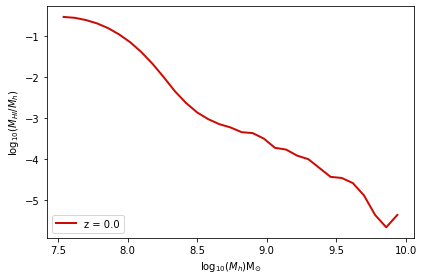

In [3]:
# FULL PLOT FOR M_HI/M_h as a function of M_h
fig, ax = plt.subplots(1, 1)

ax.plot(log_Mvir, log_HIMF_MHI_Mvir, color=np.random.rand(3,), lw=2,
        label=("z = " + redshift_used))

ax.set_xlabel(r"$\log_{10}(M_{h}){\rm M_{\odot}}$")
ax.set_ylabel(r"$\log_{10}(M_{HI}/M_{h})$")

# Add the legend
#label_z = ("z = " + str(redshift_used))
ax.legend(loc="lower left")
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("MHIMVir_Mvir")
plt.savefig("plots/" + name_of_plot + ".pdf")

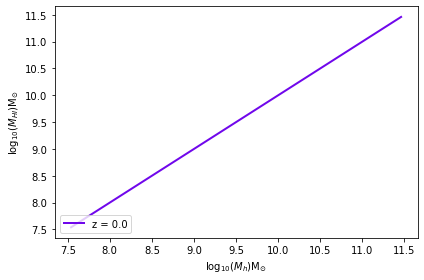

In [4]:
# FULL PLOT FOR M_HI as a function of M_h yet
fig, ax = plt.subplots(1, 1)

ax.plot(log_Mvir, log_MHI, color=np.random.rand(3,), lw=2,
        label=("z = " + redshift_used))

ax.set_xlabel(r"$\log_{10}(M_{h}){\rm M_{\odot}}$")
ax.set_ylabel(r"$\log_{10}(M_{HI}){\rm M_{\odot}}$")

# Add the legend
#label_z = ("z = " + str(redshift_used))
ax.legend(loc="lower left")
# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("MHI_Mvir")
plt.savefig("plots/" + name_of_plot + ".pdf")